In [144]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os
import sklearn.metrics
import matplotlib.pyplot as plt
import tsfel
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [145]:
# Load the .npy files from the parent directory
X_train = np.load(os.path.join('..', 'Saved_Dataset', 'X_train.npy'))
y_train = np.load(os.path.join('..', 'Saved_Dataset', 'y_train.npy'))

X_test = np.load(os.path.join('..', 'Saved_Dataset', 'X_test.npy'))
y_test = np.load(os.path.join('..', 'Saved_Dataset', 'y_test.npy'))

In [146]:
linear_acc_train = np.sqrt(X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2)
linear_acc_test = np.sqrt(X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2)

In [147]:
dt=DecisionTreeClassifier()
dt.fit(linear_acc_train,y_train)

DecisionTreeClassifier()

In [148]:
y_pred=dt.predict(linear_acc_test)

In [149]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))

Accuracy:  0.6111111111111112
Precision:  0.6118686868686869
Recall:  0.6118686868686869


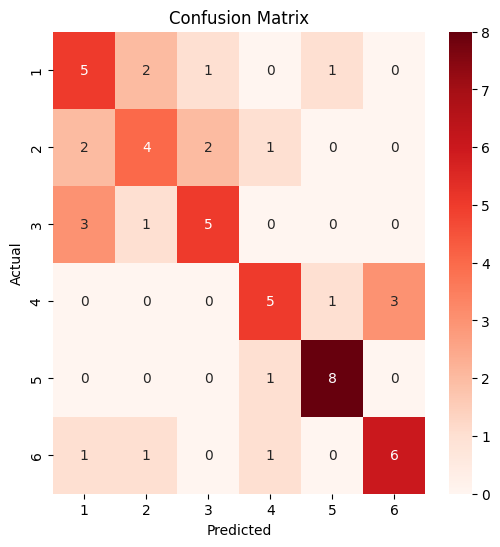

In [150]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [151]:
max_a=[tsfel.feature_extraction.features.calc_max(linear_acc_train[i]) for i in range(len(linear_acc_train))]
min_a=[tsfel.feature_extraction.features.calc_min(linear_acc_train[i]) for i in range(len(linear_acc_train))]
mean=[tsfel.feature_extraction.features.calc_mean(linear_acc_train[i]) for i in range(len(linear_acc_train))]
median=[tsfel.feature_extraction.features.calc_median(linear_acc_train[i]) for i in range(len(linear_acc_train))]
std=[tsfel.feature_extraction.features.calc_std(linear_acc_train[i]) for i in range(len(linear_acc_train))]
X_tsfel_train=np.array([mean,median,std,max_a,min_a]).transpose()
print(X_tsfel_train.shape)

(126, 5)


In [152]:
max_a=[tsfel.feature_extraction.features.calc_max(linear_acc_test[i]) for i in range(len(linear_acc_test))]
min_a=[tsfel.feature_extraction.features.calc_min(linear_acc_test[i]) for i in range(len(linear_acc_test))]
mean=[tsfel.feature_extraction.features.calc_mean(linear_acc_test[i]) for i in range(len(linear_acc_test))]
median=[tsfel.feature_extraction.features.calc_median(linear_acc_test[i]) for i in range(len(linear_acc_test))]
std=[tsfel.feature_extraction.features.calc_std(linear_acc_test[i]) for i in range(len(linear_acc_test))]
X_tsfel_test=np.array([mean,median,std,max_a,min_a]).transpose()
print(X_tsfel_train.shape)

(126, 5)


In [153]:
dt2=DecisionTreeClassifier()
dt2.fit(X_tsfel_train,y_train)

DecisionTreeClassifier()

In [154]:
y_tsfel_pred=dt2.predict(X_tsfel_test)

In [155]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_tsfel_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_tsfel_pred,average='macro'))
print("Recall: ",sklearn.metrics.precision_score(y_test, y_tsfel_pred,average='macro'))

Accuracy:  0.6296296296296297
Precision:  0.6528490028490029
Recall:  0.6528490028490029


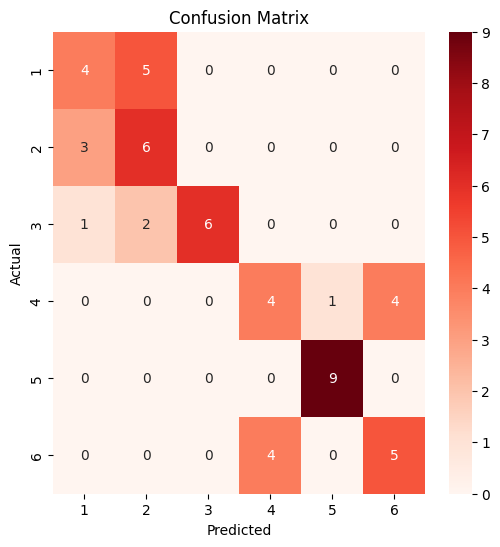

In [156]:
cm = confusion_matrix(y_test, y_tsfel_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()